In [1]:
# Import necessary libraries
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

c:\Users\Yugesh\anaconda3\envs\tf_gpu_env\lib\site-packages\requests\__init__.py:86: RequestsDependencyWarning: Unable to find acceptable character detection dependency (chardet or charset_normalizer).
  warnings.warn(
c:\Users\Yugesh\anaconda3\envs\tf_gpu_env\lib\site-packages\h5py\__init__.py:36: UserWarning: h5py is running against HDF5 1.14.6 when it was built against 1.14.5, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "


In [2]:
# Load MNIST data
mnist = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()


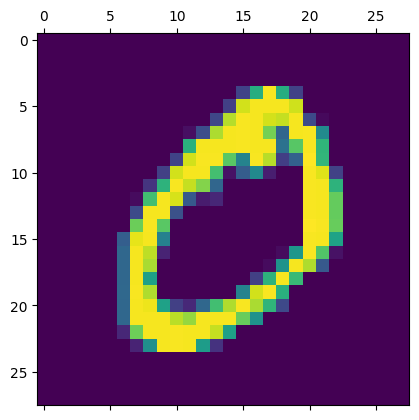

In [3]:
plt.matshow(x_train[1])

In [4]:
x_train.shape

(60000, 28, 28)

In [17]:
image_array = x_train[1].astype(np.float32) / 255.0

print(f"Image shape: {image_array.shape}")
print(f"Image min/max: {image_array.min():.3f}/{image_array.max():.3f}")


Image shape: (28, 28)
Image min/max: 0.000/1.000


In [ ]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [ ]:
# # Build model's architecture 
# model = keras.Sequential([
#     keras.layers.Dense(256, input_shape=(784,), activation='relu'),
#     keras.layers.Dropout(0.3),
#     keras.layers.Dense(128, activation='relu'),
#     keras.layers.Dropout(0.2),
#     keras.layers.Dense(64, activation='relu'),
#     keras.layers.Dropout(0.2),
#     keras.layers.Dense(32, activation='relu'),
#     keras.layers.Dense(10, activation='softmax')
# ])


In [ ]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

In [12]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(
    monitor='val_loss',   # what to watch
    patience=5,           # epochs to wait
    restore_best_weights=True
)


In [14]:
# Train with more epochs
model.fit(x_train, y_train, 
            epochs=100, 
            batch_size=32,
            validation_data=(x_test, y_test),
            callbacks=[early_stop],
            verbose=1)

# Test accuracy
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"Final test accuracy: {test_acc:.4f}")


Epoch 1/100
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0172 - accuracy: 0.9966 - val_loss: 0.0940 - val_accuracy: 0.9887
Epoch 2/100
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0165 - accuracy: 0.9968 - val_loss: 0.1209 - val_accuracy: 0.9869
Epoch 3/100
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0154 - accuracy: 0.9967 - val_loss: 0.0937 - val_accuracy: 0.9892
Epoch 4/100
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0143 - accuracy: 0.9973 - val_loss: 0.0924 - val_accuracy: 0.9898
Epoch 5/100
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0187 - accuracy: 0.9962 - val_loss: 0.1162 - val_accuracy: 0.9896
Epoch 6/100
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0178 - accuracy: 0.9968 - val_loss: 0.1283 - val_accuracy: 0.9862
Epoch 7/100
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0154 - accuracy: 0.9967 - val_loss: 0.1185 - val_

In [16]:
model.save("model.h5")


In [16]:
from tensorflow.keras.models import load_model

model1 = load_model("model.h5")


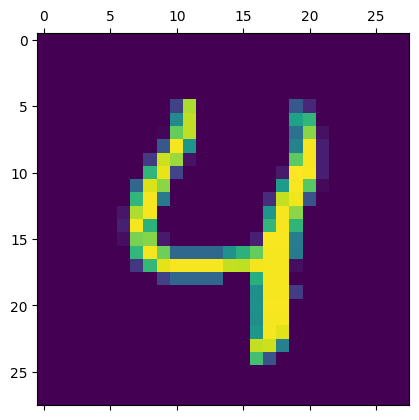

In [22]:
plt.matshow(x_test[4])

In [15]:
pred = model.predict(x_test[4:5])
np.argmax(pred)

1/1 [==============================] - 0s 252ms/step


4

In [24]:
x_test.shape

(10000, 28, 28)

In [4]:
from tensorflow.keras.models import load_model
model = load_model("model.h5")

In [5]:
model.predict(x)

NameError: name 'x' is not defined

### Try to predict with a image

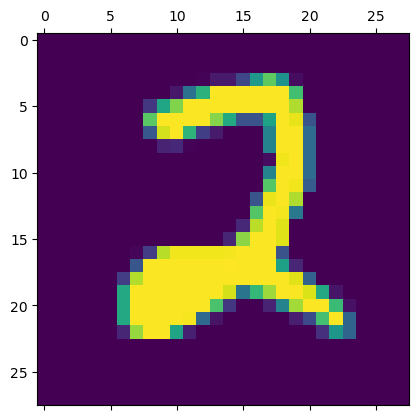

In [16]:
import matplotlib.pyplot as plt
plt.matshow(x_test[82])

In [18]:
image_data = x_test[82]

In [20]:
# Convert to numpy array
image_array = np.array(image_data, dtype=np.float32).reshape(28, 28)
# Reshape for model input
image_array = image_array.reshape(1, 784)

In [21]:
# Make prediction
predictions = model.predict(image_array, verbose=0)
predicted_digit = int(np.argmax(predictions[0]))
confidence = float(np.max(predictions[0]) * 100)

print(f"Predicted: {predicted_digit}, Confidence: {confidence:.1f}%")
print(f"All probabilities: {[f'{p:.3f}' for p in predictions[0]]}")

Predicted: 2, Confidence: 100.0%
All probabilities: ['0.000', '0.000', '1.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000']


The above model is sufficient for basic predictions since the dataset was specifically designed for this task. However, in real-world scenarios, additional preprocessing is often required before feeding data into the model to achieve more accurate and reliable predictions.

In [ ]:

# Center the digit using center of mass
if np.sum(image_array) > 0:
    # Find center of mass
    y_coords, x_coords = np.where(image_array > 0.1)
    if len(x_coords) > 0 and len(y_coords) > 0:
        center_x = int(np.mean(x_coords))
        center_y = int(np.mean(y_coords))
        
        # Calculate shift to center (14,14 is center of 28x28)
        shift_x = 14 - center_x
        shift_y = 14 - center_y
        
        # Create centered image
        centered_image = np.zeros((28, 28))
        for y in range(28):
            for x in range(28):
                new_y = y - shift_y
                new_x = x - shift_x
                if 0 <= new_y < 28 and 0 <= new_x < 28:
                    centered_image[y, x] = image_array[new_y, new_x]
        
        image_array = centered_image

# Normalize intensity
if np.max(image_array) > 0:
    image_array = image_array / np.max(image_array)

# Apply slight Gaussian blur for smoothing
from scipy.ndimage import gaussian_filter
image_array = gaussian_filter(image_array, sigma=0.5)

# Reshape for model input
image_array = image_array.reshape(1, 784)

print(f"Image shape: {image_array.shape}")
print(f"Image min/max: {image_array.min():.3f}/{image_array.max():.3f}")

# Make prediction
predictions = model.predict(image_array, verbose=0)
predicted_digit = int(np.argmax(predictions[0]))
confidence = float(np.max(predictions[0]) * 100)

print(f"Predicted: {predicted_digit}, Confidence: {confidence:.1f}%")
print(f"All probabilities: {[f'{p:.3f}' for p in predictions[0]]}")
    

Image shape: (1, 784)
Image min/max: 0.000/0.990
Predicted: 0, Confidence: 100.0%
All probabilities: ['1.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000']
